In [1]:
import sys
import os

# Add parent directory to path - this is where lensrl resides
parent_dir = os.path.abspath("..")
sys.path.append(parent_dir)

from lensrl.environment import LensDesignEnv
from lensrl.rewards import (
    RMSReward,
    ComplexityReward,
    ApertureFOVReward,
    CompositeReward,
    CompletionReward
)
from lensrl.normalization import normalizer
from lensrl.configurable_optic import ConfigurableOptic

# Define rewards

- RMS spot size reward - rewards systems with small RMS spot sizes
- Complexity reward - penalizes complex systems
- Aperture/FOV reward - rewards larger aperture (e.g., entrance pupil diameters) and large fields of view
- Completion reward - the final reward given at the end of an episode
- Composite rewards merge rewards into a single reward, which can be passed to the lens design environment

In [2]:
rms_reward = RMSReward(weight=100.0, include_delta=True, delta_weight=1.0)
complexity_reward = ComplexityReward(weight=0.1)
aperture_fov_reward = ApertureFOVReward(aperture_weight=1.0, fov_weight=0.1)
completion_reward = CompletionReward(target_fov=10.0, target_rms=0.0, weight=1000.0)

composite_reward = CompositeReward([rms_reward, complexity_reward, aperture_fov_reward, completion_reward])

# Define Lens Design Environment

We pass the reward to this environment.

In [3]:
env = LensDesignEnv(reward=composite_reward)

# Run the environment over 5 random steps

- more details on the available actions can be found in `actions.py`
- `spaces.py` contains the action and observation space definitions

In [4]:
for _ in range(5):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    env.lens.info()  # print lens info after each step
    print(f"Reward: {reward:.2f}")

╒════╤═════════════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type            │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═════════════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar          │  inf     │   inf       │ Air        │       0 │       3.35484   │
│  1 │ Standard        │  122.16  │     3.0037  │ N-SF8      │       0 │       3.35484   │
│  2 │ Standard        │ -136.067 │     4.63048 │ Air        │       0 │       3.32119   │
│  3 │ Stop - Standard │  756.802 │     7.32772 │ N-LASF45HT │       0 │       3.15572   │
│  4 │ Standard        │ -219.749 │    59.402   │ Air        │       0 │       2.99673   │
│  5 │ Planar          │  inf     │   nan       │ Air        │       0 │       0.0266344 │
╘════╧═════════════════╧══════════╧═════════════╧════════════╧═════════╧═════════════════╛
Reward: -10043.84
╒════╤═════════════════╤══════════╤═════════════╤════════════╤═════════╤

# View the lens after 5 random steps

- NOTE: there is no guarantee that these random steps will generate a valid design.

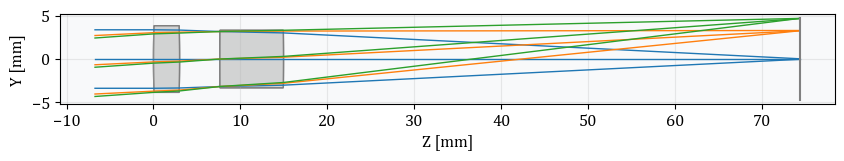

In [5]:
env.lens.draw()